In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
# To save models
import math
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [30]:
df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes")

## modelo del modelo 1

In [31]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [32]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

### visualizacion del arbol

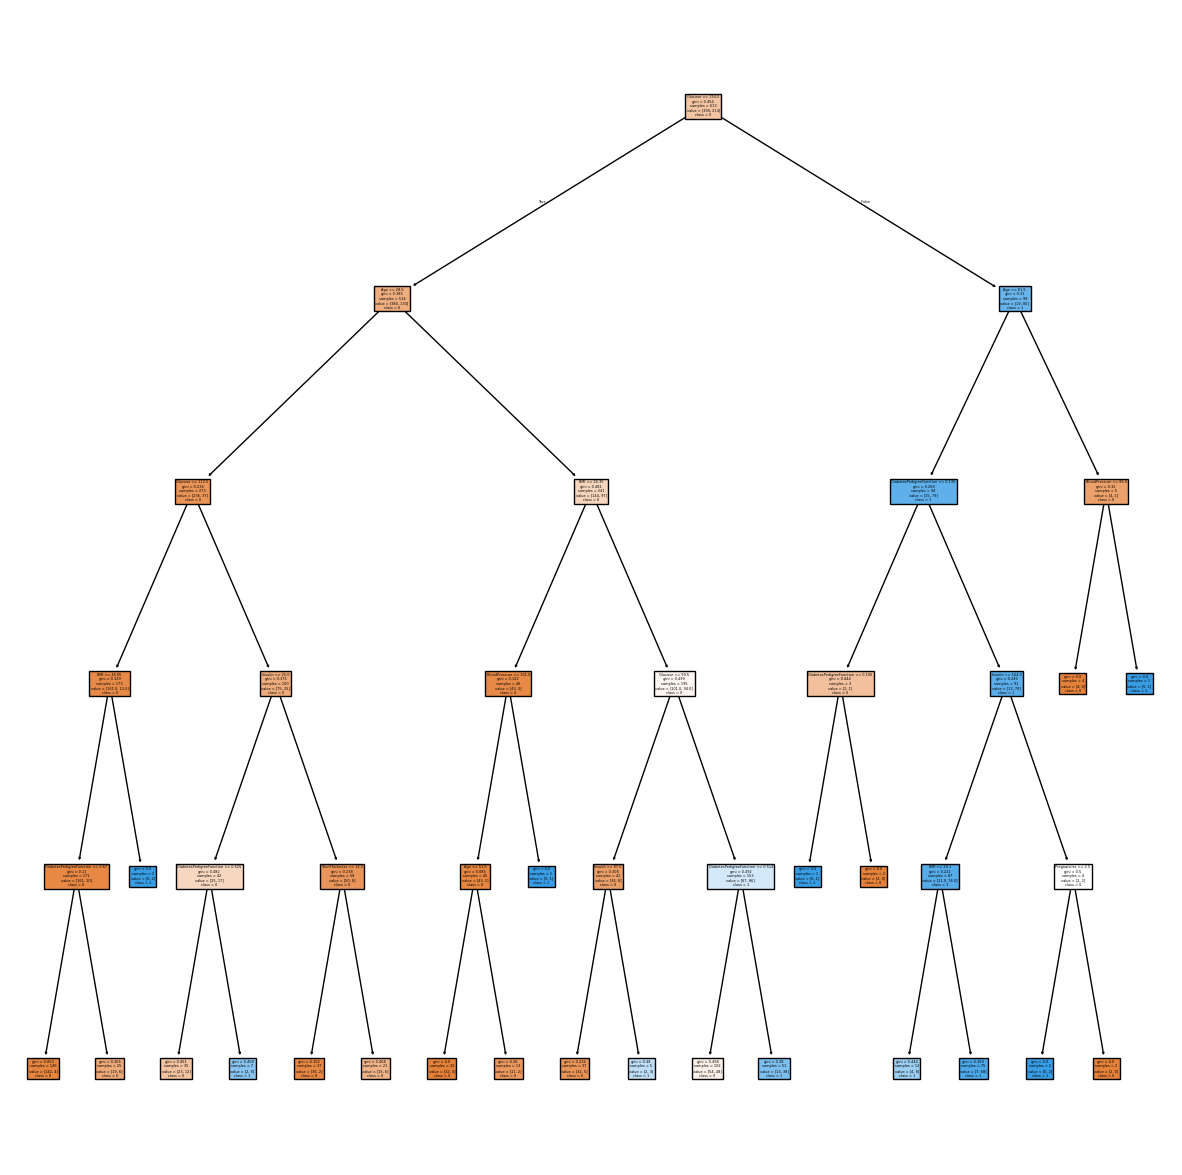

In [33]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

### Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [34]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [35]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente.

In [36]:
accuracy_score(y_test, y_pred_test)

0.7857142857142857

In [37]:
accuracy_score(y_train, y_pred_train)

0.8156606851549756

se puede observar un buen ajuste para los datos entrenados del 84% y un ajuste del 74% para los datos de prueba

## Modelo 2: datos con insulina igual a cero

In [38]:
df_insulin_with_cero = df[df["Insulin"] == 0]

#dataset solo con los datos de insulina en cero
# Dividimos el conjunto de datos en muestras de train y test
X2 = df_insulin_with_cero.drop("Outcome", axis=1)
y2 = df_insulin_with_cero["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.2,
                                                    random_state=18)

In [39]:
df_insulin_without_cero = df[df["Insulin"] > 0]

#dataset solo con los datos de insulina mayores a cero
# Dividimos el conjunto de datos en muestras de train y test

X3 = df_insulin_without_cero.drop("Outcome", axis=1)
y3 = df_insulin_without_cero["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,
                                                    y3,
                                                    test_size=0.2,
                                                    random_state=18)

In [40]:
#creando un modelo solo con los valores de insulina en cero
model2 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 4, min_samples_split= 10, random_state = 42)
model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
y_pred2 = model2.predict(X2_test)
accuracy_score(y2_test, y_pred2)

0.5866666666666667

In [42]:
#probando el modelo con datos sin cero en insulina
y_pred2 = model2.predict(X2_train)
accuracy_score(y2_train, y_pred2)

0.8758389261744967

se puede observar que al hacer el modelo con los datos  de entrenamiento en donde la insulina es igual a cero no generan valores altos de aceptacion del modelo,  para una proxima prueba se creara el modelo de entrenamiento solo con los datos en donde la insulina es mayor que cero y se probaran con los datos cuya insulina es igual a cero

## Modelo 3: datos con insulina mayor a cero

In [43]:
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
#probando con el mismo data set
y_pred3 = model3.predict(X3_test)
accuracy_score(y3_test, y_pred3)

0.7721518987341772

In [45]:
#prueba con los datos en donde la insulina es igual a cero
y_pred5 = model3.predict(X3_train)
accuracy_score(y3_train, y_pred5)

1.0

Se logra observar que para el modelo 3 y para  el modelo 2, no se obtienen buenos resultados al separar el dataset dependiendo de los valores de insulina

## modelo 4: eliminando la variable insulina

In [46]:
# Dividimos el conjunto de datos en muestras de train y test
X4 = df.drop(["Outcome", "Insulin"], axis=1)
y4 = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,
                                                    y4,
                                                    test_size=0.2,
                                                    random_state=18)

In [47]:
model4 = DecisionTreeClassifier( max_depth = 5, min_samples_leaf= 3, min_samples_split = 10,  random_state = 42)
model4.fit(X4_train, y4_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
#probando la prediccion con los datos de prueba
y_pred7 = model4.predict(X4_test)
accuracy_score(y4_test, y_pred7)

0.7597402597402597

In [49]:
#probando la prediccion con los datos de entrenamiento
y_pred8 = model4.predict(X4_train)
accuracy_score(y4_train, y_pred8)

0.8075040783034257

usando los datos de prueba el modelo nos da un 76% de aciertos en la prediccion con los datos de prueba lo que  resulta el modelo con valor mas alto entre todos los modelos realizados

In [50]:
with open("/workspaces/betaniammc-machine-learning/models/diabetes_decitions_model.pkl", "wb") as file:
    pickle.dump(model4, file)

## Modelo 5: reemplazando el cero de insulina por la media de la columna

In [51]:
df["Insulin"] = df["Insulin"].replace(0, np.nan)

promedio = df["Insulin"].mean()
df["Insulin"] = df["Insulin"].fillna(promedio)

In [52]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [53]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [55]:
accuracy_score(y_test, y_pred_test)

0.7922077922077922

In [56]:
y_pred_train  = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8107667210440457